In [2]:
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l

def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

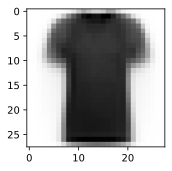

In [3]:
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                            train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1 ]).type(torch.float32)

ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28,28).tolist(), cmap='Greys')
d2l.plt.show()

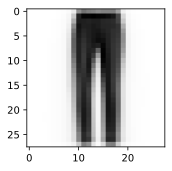

In [4]:
d2l.plt.imshow(ave_1.reshape(28, 28), cmap='Greys')
d2l.plt.show()

In [6]:
w = (ave_1 - ave_0).T

In [8]:
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000
# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)